# BOSTON HOUSE PRICE PREDICTION
---

In [15]:
# use this to read directly from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
boston['feature_names']   #column names of the dataset

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [30]:
data=boston.data

In [42]:
data.shape

(506, 14)

In [32]:
data=pd.DataFrame(data=data,columns=boston.feature_names) #creating a dataframe

In [33]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [34]:
data['Price']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Summary:
**CHAS** has a value of 0 in 25th, 50th and 75th percentile.
**ZN** has a value of 0 in 25th and 50th percentile.(These variable are categorical and boolean(conditional)

In [39]:
data.describe().loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
Name: mean, dtype: float64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [44]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [46]:
data.duplicated().sum()

0

<AxesSubplot:>

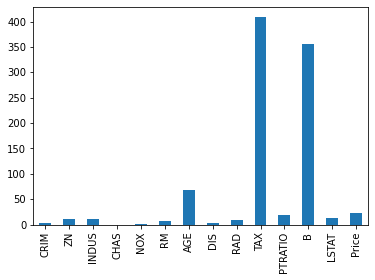

In [47]:
data.describe().loc['mean'].plot.bar() 

---
## Distribution plot for each feature_names

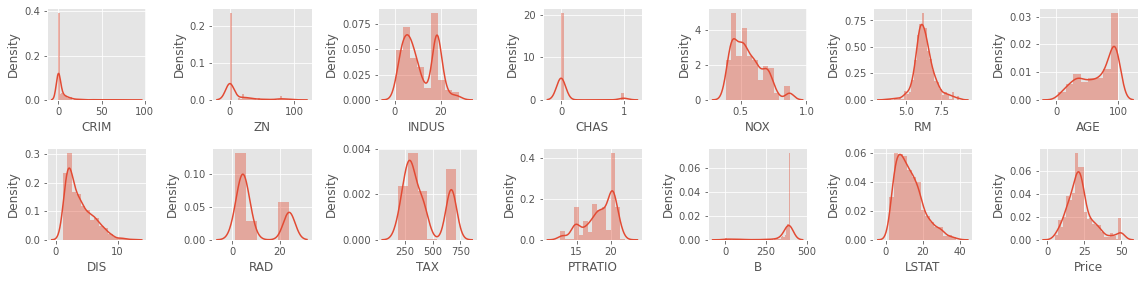

In [76]:
rows=2
cols=7
fig, ax = plt.subplots(rows,cols,figsize=(16, 4)) 

col=data.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index += 1
plt.tight_layout()


### Summary:   
**CRIM, ZN, B** has highly skewed distribution.
**MEDV/Price** has a normal distribution (price prediction) and 
other columns have normal or bimodal ditribution of data.

---
## Scatterplot for each features_names.

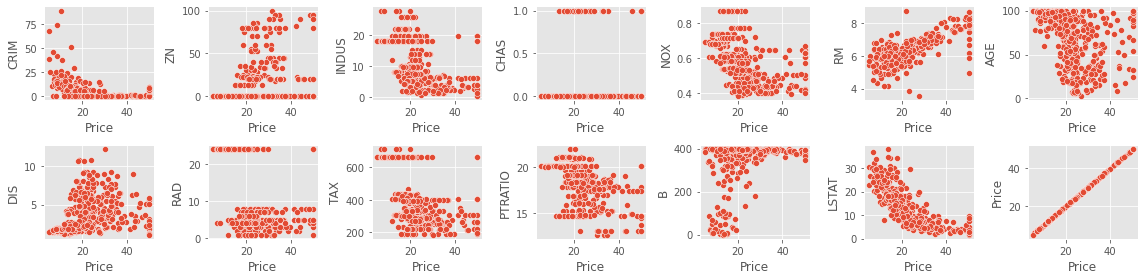

In [74]:
rows=2
cols=7
fig, ax = plt.subplots(rows,cols,figsize=(16, 4)) 
                                                
col=data.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x='Price',y=col[index],data=data,ax=ax[i,j])
        index+=1
plt.tight_layout()
plt.show()

### Summary:
There is both positive and negative correlation seen.

---
## Heatmap

In [90]:
cor=data.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


(490, 14)


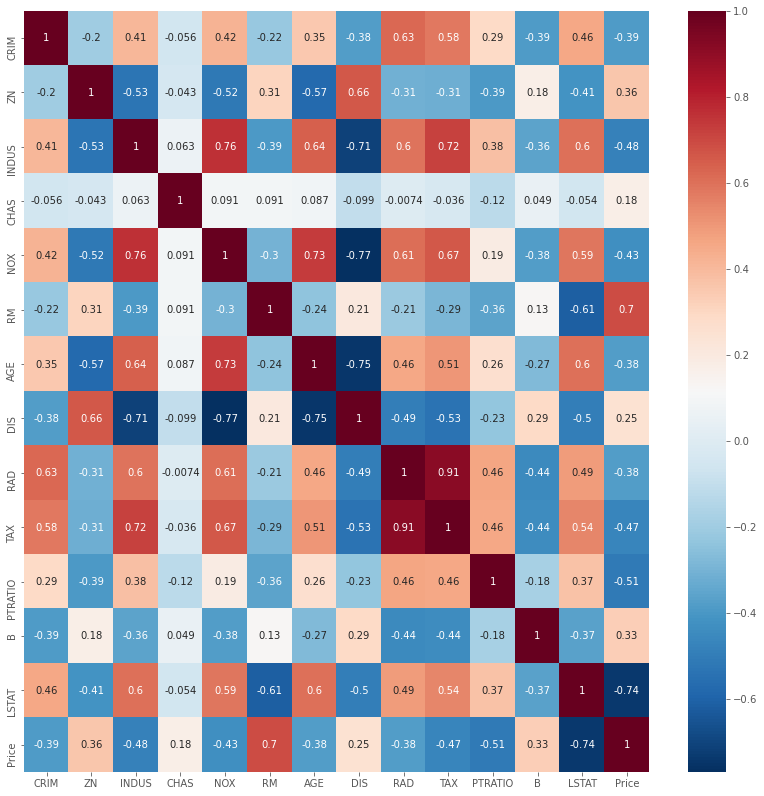

In [92]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(cor,annot=True,cmap='RdBu_r')

print(np.shape(data[~(data['Price'] >= 50.0)]))

In [99]:
def getcorfeat(cor,threshold):
    feature=[]
    value=[]
    for i,index in enumerate(cor.index):
        if abs(cor[index])> threshold:
            feature.append(index)
            value.append(cor[index])
    df=pd.DataFrame(data=value,index=feature,columns=['cor value'])

    return df
        

In [101]:
threshold=0.5
cor_df=getcorfeat(cor['Price'],threshold)

In [102]:
cor_df 

,cor value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


## Summary:
Highly correlated with the price (RM is positive correlation)
(PTRatio is negative i.e if it is negative then the price of the house is more) 

In [103]:
cor_data=data[cor_df.index]
cor_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


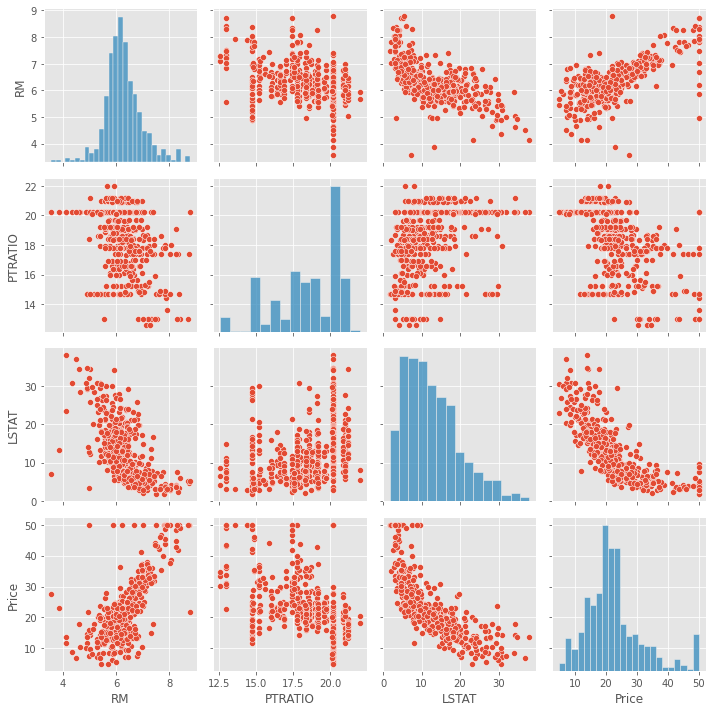

In [104]:
sns.pairplot(cor_data)
plt.tight_layout()

<AxesSubplot:>

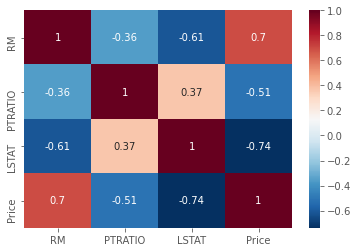

In [108]:
sns.heatmap(cor_data.corr(),annot=True,cmap='RdBu_r')

---
## Boxplot and Relplot

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

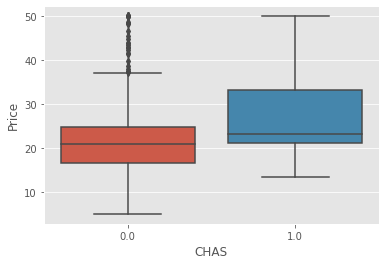

In [110]:
sns.boxplot(x='CHAS',y='Price',data=data)

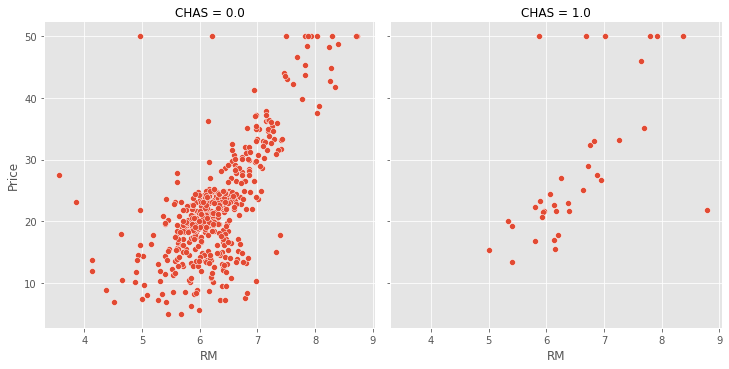

In [114]:
sns.relplot(x='RM',y='Price',data=data,col='CHAS')

<AxesSubplot:xlabel='RM', ylabel='Price'>

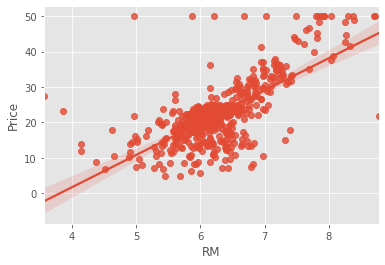

In [116]:
sns.regplot(x='RM',y='Price', data=data)

---
## Training and Testing Data

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = data.drop(['Price'], axis = 1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [147]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [124]:
lm.intercept_

40.218929012550674

In [160]:
predictions = lm.predict(X_train)

In [152]:
from sklearn import metrics

In [174]:
print('MAE:',metrics.mean_absolute_error(y_train,predictions))#train test
print('MSE:',metrics.mean_squared_error(y_train, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, predictions)))
print('variance:',metrics.explained_variance_score(y_train,predictions))

MAE: 3.0731388725045385
MSE: 19.475903780713956
RMSE: 4.413151230211124
variance: 0.7471263931918002


---
## Predicting the test data

In [183]:
prediction2 = lm.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices')

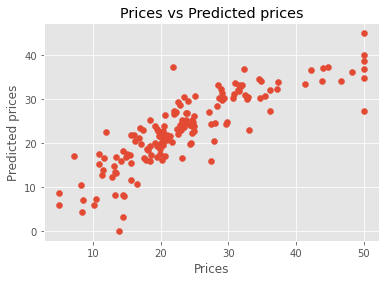

In [184]:
plt.scatter(y_test, prediction2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")

---
## Evaluating the model

In [192]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction2))
print('MSE:',metrics.mean_squared_error(y_test, prediction2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction2)))
print('variance:',metrics.explained_variance_score(y_test,prediction2))

MAE: 3.835696361418932
MSE: 28.54758527146811
RMSE: 5.342994036256087
variance: 0.7159077498498645


---
##  Residual

Text(0, 0.5, 'Residuals')

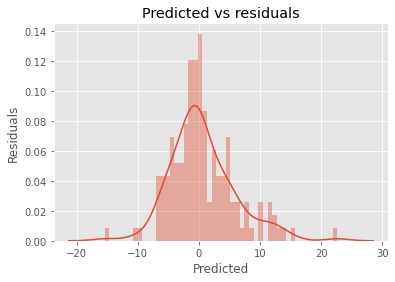

In [186]:
sns.distplot(y_test-prediction2,bins=50)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

---
## Conclusion 

I chose MSE as we want the model to be sensitive to large errors in predicting the prices rather than a scaled weight which plays down errors when overfitting.


**The value predicted is 28.5475 as the optimal price to sell. The predicted value is close to the mean & median of the house prices in the data set.**

---